# MIP:mini project
name:zhouting number：202428013826035

(512, 512)


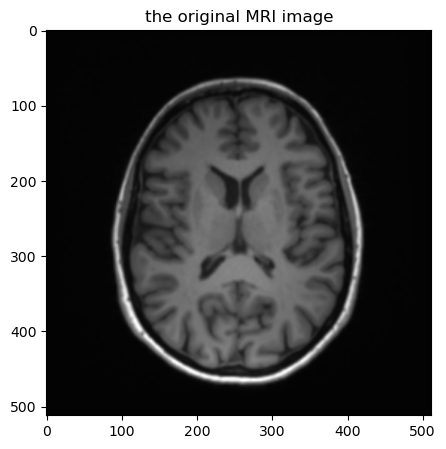

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image_path = r'C:\Users\Administrator.DESKTOP-DJPMUJC\Desktop\HOMEWORK\医学图像处理\WechatIMG69.jpg'
oriimage=Image.open(image_path)#3D!
oriimage = oriimage.convert('L')#转为灰度图
img_array=np.array(oriimage,dtype=np.float32)
print(img_array.shape)#(512, 512, 4)
#show the original medical picture
plt.figure(figsize=(5,5))
plt.imshow(img_array,cmap='gray')
#plt.axis('off')
plt.title('the original MRI image')
plt.show()


# Task 1:Contrast Enhancement
# Task 1.1:Implement gamma contrast compression on the original MRI image

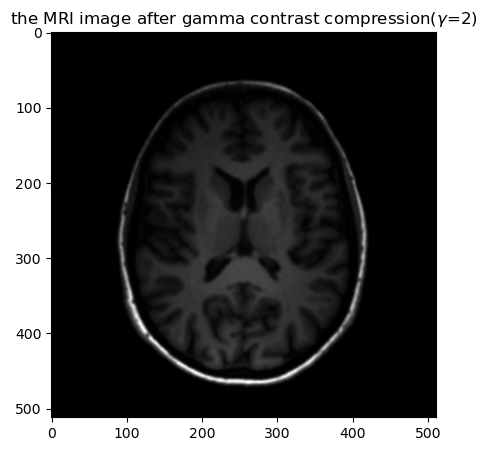

In [3]:
# define the gamma contrast compression function
def gamma_compression(image_array,gamma):
    """
    para:
    image: object;gamma:the gamma value foe contrast adjustment
    return:
    a new image ofter gamma compression
    """
    # convert the image into a numpy array for effective processing
    #img_array=np.array(image,dtype=np.float32)
    image_array=image_array/255.0
    # Apply gamma correction
    corrected_array = np.power(image_array, gamma)
    
    # Scale back to [0, 255] and convert to uint8
    corrected_array = (corrected_array * 255).astype(np.uint8)
    return corrected_array

gamma_value=2#if gamma==1 no change
corrected_array=gamma_compression(img_array,gamma_value)
image_compressed=Image.fromarray(corrected_array)
#show the original medical picture  
plt.figure(figsize=(5,5))
plt.imshow(image_compressed,cmap='gray')
plt.title(fr'the MRI image after gamma contrast compression($\gamma$={gamma_value})')
#plt.axis('off')
plt.show()
    

## Task1.2 Implement histogram equalization to restore contrast

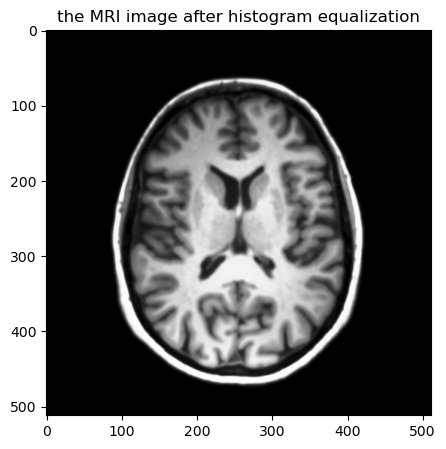

In [4]:
# define the histogram equalization function
def histogram_equalization(image_array):
    """
    Apply histogram equalization to a grayscale image.
    
    Parameters:
    - image: A PIL Image object (grayscale).
    
    Returns:
    - A new PIL Image object with histogram equalization applied.
    """
    # Convert the image to a NumPy array for efficient processing
    #img_array = np.array(image, dtype=np.uint8)
    
    # Flatten the image to a 1D array of pixel values
    flat_img = image_array.flatten()
    
    # Compute the histogram of the image (CDF)   
    hist, bins = np.histogram(flat_img, bins=256, range=(0, 256), density=True)#bine:区间数量  density是否均一化
    
    # Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()  #cdf[-1]=1
    cdf_normalized = cdf * 255 / cdf[-1]  # (L-1)*cdf得到对应结果 Normalize CDF to [0, 255]
    
    # Map the original pixel values to new values using the CDF
    equalized_img = np.interp(flat_img, bins[:-1], cdf_normalized).reshape(image_array.shape)
    #np.interp 函数在这里主要执行线性插值操作。它依据给定的两组数据点（一组是自变量的取值，一组是对应
    #的因变量取值），来确定输入的另一组自变量数据（这里是 flat_img ）所对应的因变量值（插值结果）。
    
    # Convert the result back to uint8
    equalized_img = equalized_img.astype(np.uint8)
    
    return equalized_img
    
image_he_array=histogram_equalization(corrected_array)
# Convert the NumPy array back to a PIL Image
image_he_image = Image.fromarray(image_he_array)
#show the original medical picture
plt.figure(figsize=(5,5))
plt.imshow(image_he_image,cmap='gray')
plt.title('the MRI image after histogram equalization')
#plt.axis('off')
plt.show()

# Task 2: Image Degradation and Restoration

## Task2.1:Image Degradation: Implement Gaussian blur and add Gaussian noise to the blurred image

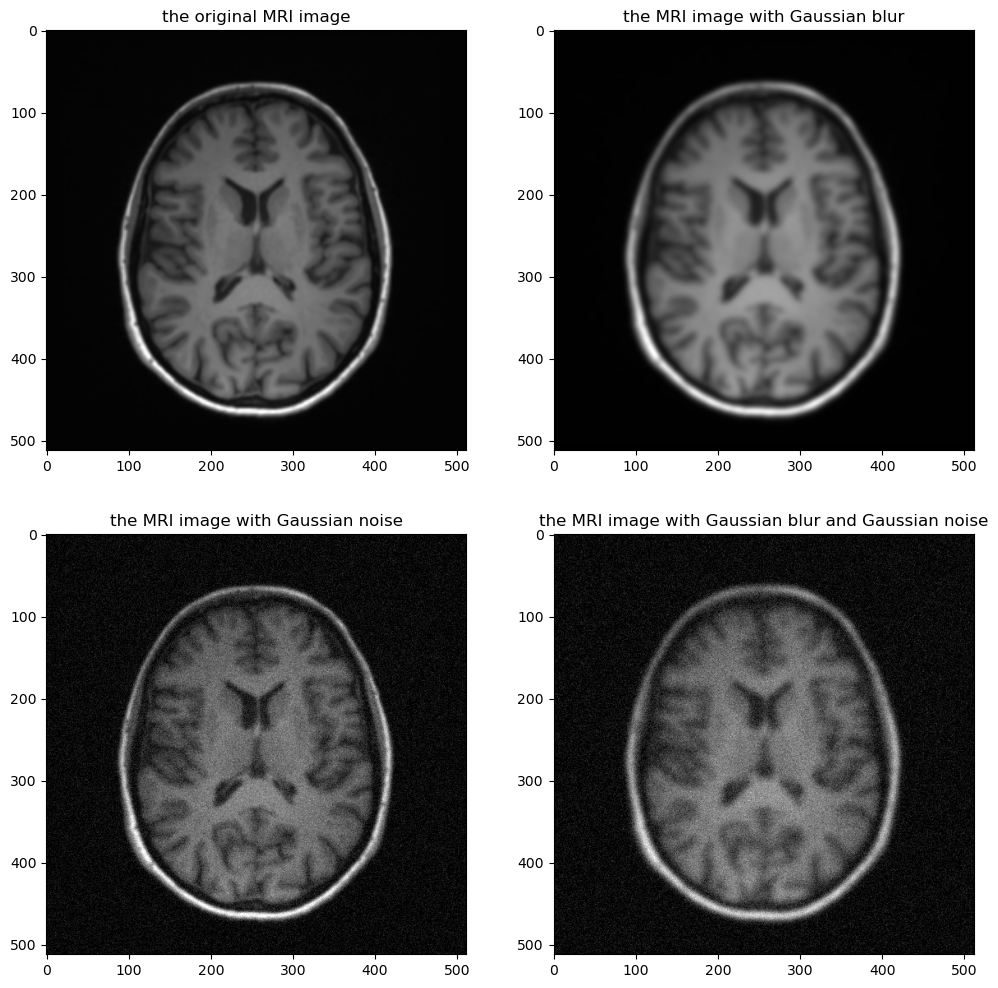

In [68]:
from scipy.ndimage import convolve  
def generate_gaussian_kernel(size, sigma):
    """
    Generate a 2D Gaussian kernel.
    
    Parameters:
    - size: The size of the kernel (odd integer).
    - sigma: Standard deviation for the Gaussian function.
    
    Returns:
    - A 2D NumPy array representing the Gaussian kernel.
    """
    # Ensure the size is odd
    if size % 2 == 0:
        raise ValueError("Kernel size must be an odd integer.")
    
    # Create a grid of coordinates
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    
    # Compute the Gaussian function
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2)))
    
    # Normalize the kernel so that its sum is 1
    g /= g.sum()
    
    return g

def apply_gaussian_blur(image_array, kernel_size=13, sigma=3.0):
    """
    Apply Gaussian blur to an image using a custom Gaussian kernel.
    
    Parameters:
    - image: A PIL Image object (grayscale or RGB).
    - kernel_size: The size of the Gaussian kernel (odd integer).
    - sigma: Standard deviation for the Gaussian function.
    
    Returns:
    - A new PIL Image object with Gaussian blur applied.
    """
    
    # Generate the Gaussian kernel
    kernel = generate_gaussian_kernel(kernel_size, sigma)
    
    # Apply the Gaussian filter using convolution
    blurred_img = convolve(image_array[:,:], kernel, mode='reflect')
    
    # Clip the values to [0, 255] and convert back to uint8
    blurred_img = np.clip(blurred_img, 0, 255).astype(np.uint8)
    
    # Convert the NumPy array back to a PIL Image
    #blurred_image = Image.fromarray(blurred_img)
    
    return blurred_img,kernel

def add_gaussian_noise(image_array, mean=0, std=15):
    """
    Add Gaussian noise to an image.
    
    Parameters:
    - image: A PIL Image object (grayscale or RGB).
    - mean: Mean of the Gaussian distribution.
    - std: Standard deviation of the Gaussian distribution.
    
    Returns:
    - A new PIL Image object with Gaussian noise added.
    """
    # Generate Gaussian noise
    noise = np.random.normal(mean, std, image_array.shape)
    
    # Add the noise to the image
    noisy_img = image_array + noise
    
    # Clip the values to [0, 255] and convert back to uint8
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    
    return noisy_img

image_guassblur_array,guass_blurkernel=apply_gaussian_blur(img_array)
image_guassblur = Image.fromarray(image_guassblur_array)

image_guassnoise_array=add_gaussian_noise(img_array)
image_guassnoise = Image.fromarray(image_guassnoise_array)

image_guassbandn_array=add_gaussian_noise(image_guassblur_array)
image_guassbandn = Image.fromarray(image_guassbandn_array)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0][0].imshow(img_array,cmap='gray')
axs[0][0].set_title('the original MRI image')
axs[0][1].imshow(image_guassblur,cmap='gray')
axs[0][1].set_title('the MRI image with Gaussian blur')
axs[1][0].imshow(image_guassnoise,cmap='gray')
axs[1][0].set_title('the MRI image with Gaussian noise')
axs[1][1].imshow(image_guassbandn,cmap='gray')
axs[1][1].set_title('the MRI image with Gaussian blur and Gaussian noise')
plt.show()

## Task2.2:Implement two different denoising methods(Arithmetic Mean Filter and median Filter)

<class 'numpy.ndarray'>


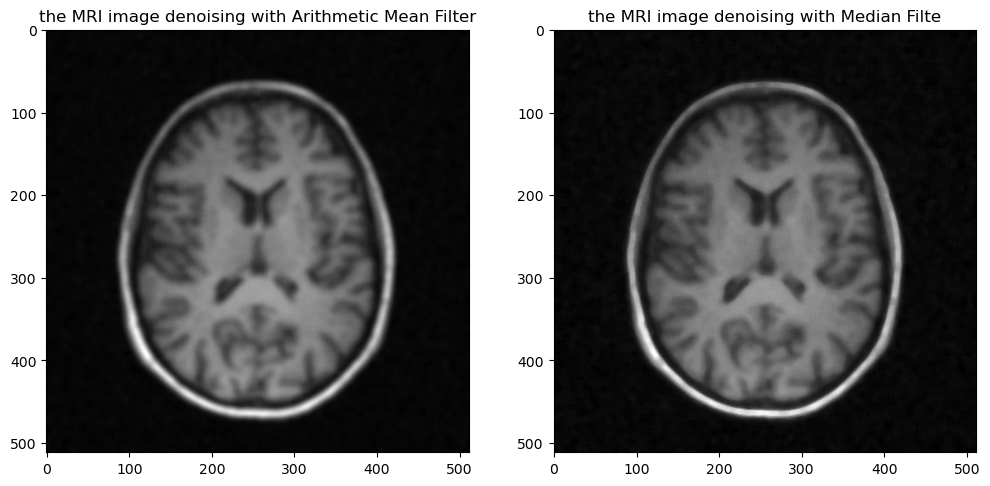

In [70]:
#define the arithmetic mean filter and the median filter
def arithmetic_mean_filter(image, kernel_size=9):
    """
    Apply an arithmetic mean filter to a grayscale image manually.
    
    Parameters:
    - image: A 2D NumPy array representing the grayscale image.
    - kernel_size: The size of the mean filter (odd integer).
    
    Returns:
    - A new 2D NumPy array with the mean filter applied.
    """
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd integer.")
    
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='reflect')#边界反射填充，比image和filterimage图片大
    filtered_image = np.zeros_like(image, dtype=np.float32)#初始化结果图
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i + kernel_size, j:j + kernel_size]#计算均值核大小，在已经填充的image上
            mean_value = np.mean(neighborhood)#计算均值
            filtered_image[i, j] = mean_value
    
    return filtered_image
#define the median mean filter and the median filter
def median_filter(image, kernel_size=9):
    """
    Apply a median filter to a grayscale image manually.
    
    Parameters:
    - image: A 2D NumPy array representing the grayscale image.
    - kernel_size: The size of the median filter (odd integer).
    
    Returns:
    - A new 2D NumPy array with the median filter applied.
    """
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd integer.")
    
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='reflect')
    filtered_image = np.zeros_like(image, dtype=np.float32)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i + kernel_size, j:j + kernel_size]
            median_value = np.median(neighborhood)
            filtered_image[i, j] = median_value
    
    return filtered_image

image_meanf=arithmetic_mean_filter(image_guassnoise_array)
image_medianf=median_filter(image_guassnoise_array)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
print(type(image_medianf))
axs[0].imshow(image_meanf,cmap='gray')
axs[0].set_title('the MRI image denoising with Arithmetic Mean Filter')
axs[1].imshow(image_medianf,cmap='gray')
axs[1].set_title('the MRI image denoising with Median Filte')
plt.show()

## Task2.3:Image Restoration with inverse filter,inverse filter with cutoff and Wiener filter

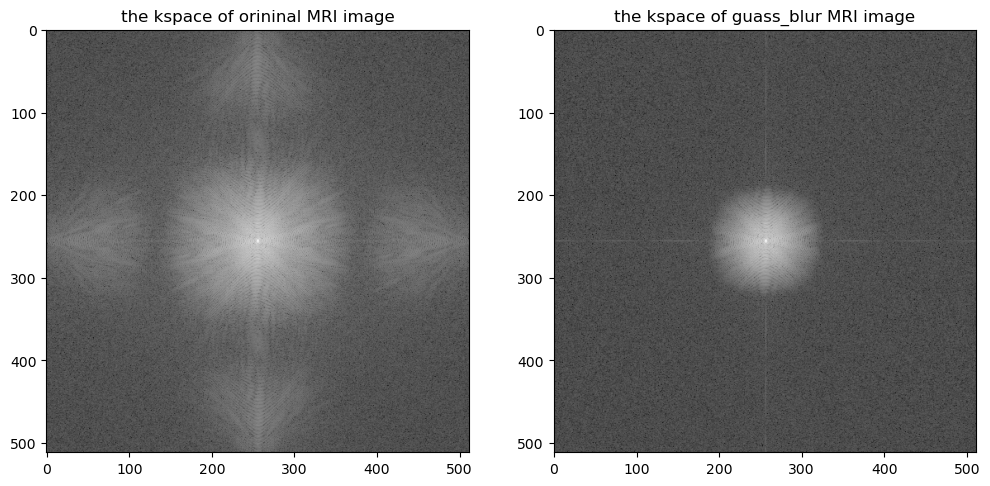

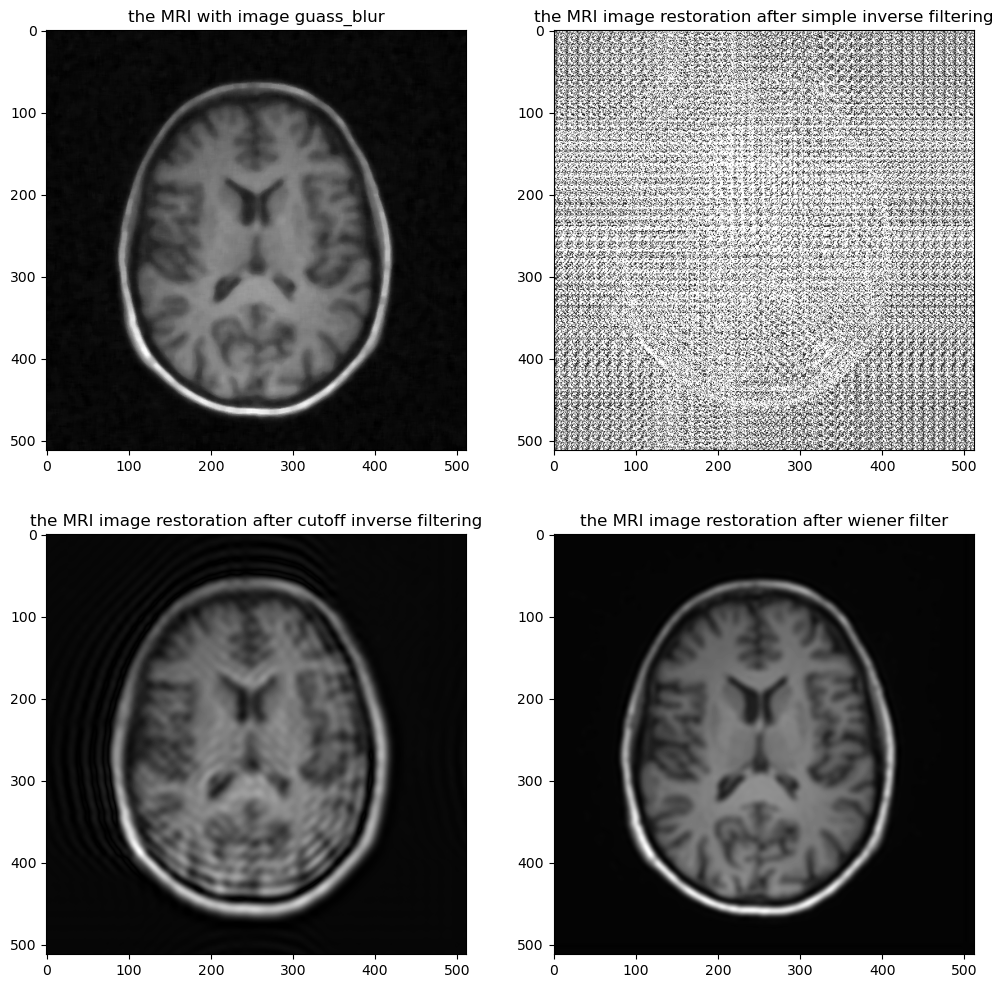

In [71]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift
# 计算fft之后的频率距离矩阵
def compute_frequency_distance2(H):
    M, N = H.shape
    u = np.arange(M) - M // 2
    v = np.arange(N) - N // 2
    u, v = np.meshgrid(v, u)
    D = np.sqrt(u**2 + v**2)
    #plt.imshow(D)
    #plt.colorbar()
    return D
# 直接反滤波
def inverse_filtering(blurred_img, kernel):
    # Perform FFT on the blurred image and the kernel
    blurred_fft = fft2(blurred_img)
    kernel_fft = fft2(fftshift(kernel), s=blurred_img.shape)
    # Apply the inverse filter
    restored_fft = blurred_fft / (kernel_fft + 1e-6)  # Add a small constant to avoid division by zero
    restored_img = np.abs(ifft2(restored_fft))
    # Clip the values to [0, 255] and convert back to uint8
    restored_img = np.clip(restored_img, 0, 255).astype(np.uint8)
    return restored_img    
# 截止逆滤波
# 结合直接反滤波和Butterworth低通滤波
def cutoff_inverse_filtering(blurred_img, kernel, cutoff_frequency, order=2):
    # Perform FFT on the blurred image and the kernel
    blurred_fft = fft2(blurred_img)
    kernel_fft = fft2(fftshift(kernel), s=blurred_img.shape)
    
    # Apply the inverse filter
    restored_fft = blurred_fft / (kernel_fft + 1e-6)  # Add a small constant to avoid division by zero
    
    # Create and apply the Butterworth lowpass filter
    rows, cols = blurred_img.shape
    u, v = np.ogrid[:rows, :cols]
    center = (rows // 2, cols // 2)
    radius = np.sqrt((u - center[0])**2 + (v - center[1])**2)
    butterworth_filter = 1 / (1 + (radius / cutoff_frequency)**(2 * order))
    butterworth_filter = fftshift(butterworth_filter)
    
    filtered_fft = restored_fft * butterworth_filter
    
    # Inverse FFT to get the final restored image
    restored_img = np.abs(ifft2(filtered_fft))
    
    # Clip the values to [0, 255] and convert back to uint8
    restored_img = np.clip(restored_img, 0, 255).astype(np.uint8)
    
    return restored_img
# 维纳滤波
def wiener_filter(g, kernel, K):
    #g=image_meanf or image_medianf
    H = fft2(kernel, s=g.shape)
    G = fft2(g)
    H_conj = np.conj(H)#取共轭
    H_squared = np.abs(H)**2
    F_wiener = (H_conj / (H_squared + K)) * G
    f_wiener = np.abs(ifft2(F_wiener))
    return f_wiener

# 对比原始图像和模糊图像的K空间
img_array_fft = np.fft.fft2(img_array)
img_array_fft_shifted = np.fft.fftshift(img_array_fft)
magnitude_spectrum1 = np.abs(img_array_fft_shifted)

image_guassblur_fft = np.fft.fft2(image_guassblur_array)
image_guassblur_fft_shifted = np.fft.fftshift(image_guassblur_fft)
magnitude_spectrum2 = np.abs(image_guassblur_fft_shifted)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(np.log(magnitude_spectrum1),cmap='gray')
axs[0].set_title('the kspace of orininal MRI image')
axs[1].imshow(np.log(magnitude_spectrum2),cmap='gray')
axs[1].set_title('the kspace of guass_blur MRI image')
plt.show()

#将上面的高斯模糊核转换到频域（H已知）
#g=image_meanf or image_medianf
#myH = fft2(guass_blurkernel, s=image_meanf.shape)
#plt.imshow(np.abs(H))
 # 设置截止频率
frequencyofcut =20# 你可以根据实际情况调整这个值

# 应用逆滤波and截止逆滤波
f_inverse= inverse_filtering(image_guassblur_array,guass_blurkernel)
f_cutoff=cutoff_inverse_filtering(image_guassblur_array,guass_blurkernel,frequencyofcut)
# 应用维纳滤波
f_winener = wiener_filter(image_guassblur_array,guass_blurkernel,K=0.08)
#绘制逆滤波结果
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0][0].imshow(image_medianf,cmap='gray')
axs[0][0].set_title('the MRI with image guass_blur')
axs[0][1].imshow(f_inverse,cmap='gray')
axs[0][1].set_title('the MRI image restoration after simple inverse filtering')
axs[1][0].imshow(f_cutoff ,cmap='gray')
axs[1][0].set_title('the MRI image restoration after cutoff inverse filtering')
axs[1][1].imshow(f_winener,cmap='gray')
axs[1][1].set_title('the MRI image restoration after wiener filter')
plt.show()

# Task 3:image segmrntation
## Task 3.1:Edge Detection with Sobel operator and Laplacian of Gaussian (LoG) operator

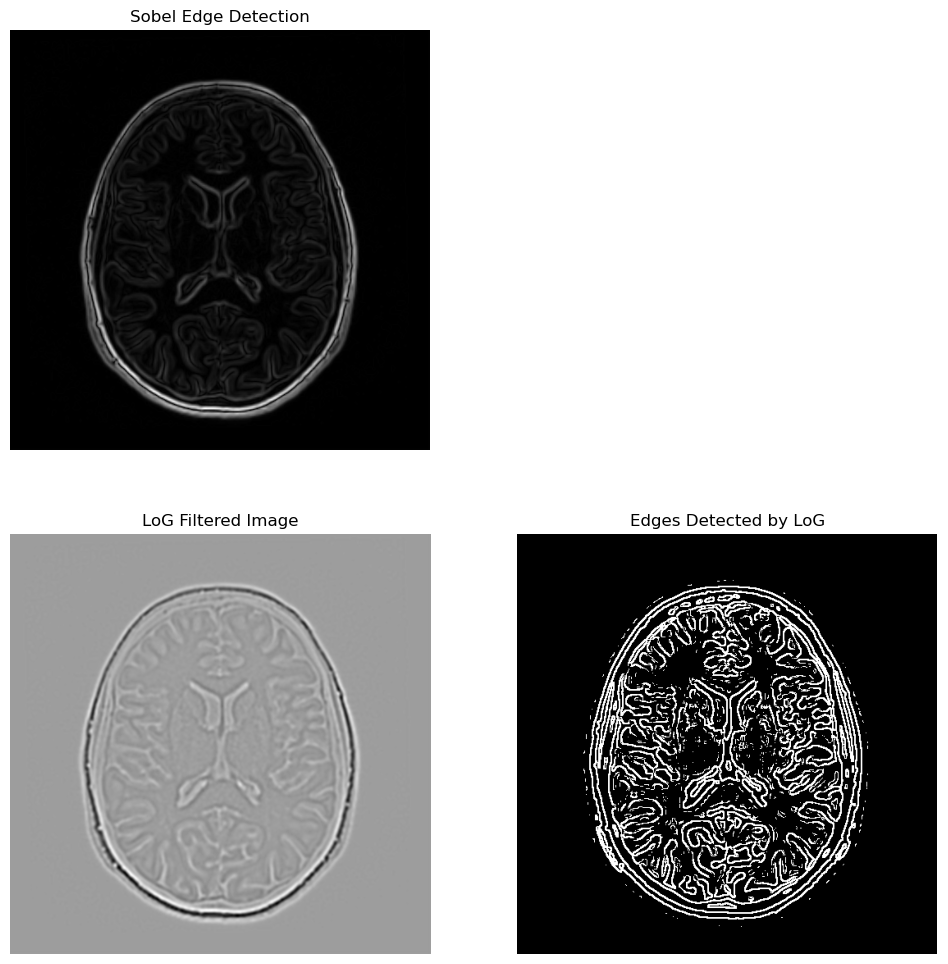

In [72]:
# 定义 Sobel 卷积核
sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_y_kernel = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

# 应用 Sobel 卷积核
sobel_x = convolve(img_array, sobel_x_kernel)
sobel_y = convolve(img_array, sobel_y_kernel)
# 计算梯度幅值
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# 归一化梯度幅值到 [0, 255] 范围
gradient_magnitude_normalized = (gradient_magnitude / np.max(gradient_magnitude)) * 255
gradient_magnitude_normalized = gradient_magnitude_normalized.astype(np.uint8)

#Laplacian Kernel
laplacian_kernel=np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]], dtype=np.float64)

# 定义高斯核大小和标准差
sigma = 1.4
gaussian_size = int(6 * sigma + 1)  # 通常选择 6*sigma 的大小

# 创建高斯核和拉普拉斯核
gaussian = generate_gaussian_kernel(gaussian_size, sigma)
laplacian = laplacian_kernel

# 应用高斯滤波
smoothed_image = convolve(img_array, gaussian)

# 应用拉普拉斯算子
log_image = convolve(smoothed_image, laplacian)

# 将 LoG 结果归一化到 [0, 255] 范围
log_image_normalized = (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image)) * 255
log_image_normalized = log_image_normalized.astype(np.uint8)

# 检测零交叉点（边缘）
def zero_crossing(image,threshold):
    zero_crossing_image = np.zeros_like(image, dtype=np.uint8)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            patch = image[i-1:i+2, j-1:j+2]
            max_val = np.max(patch)
            min_val = np.min(patch)
            if max_val > 0 and min_val < 0:
                if np.abs(max_val) > threshold or np.abs(min_val) > threshold:
                    zero_crossing_image[i, j] = 255
    return zero_crossing_image

edges = zero_crossing(log_image,threshold=0.05*np.max(log_image))

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0][0].imshow(gradient_magnitude_normalized, cmap='gray')
axs[0][0].set_title('Sobel Edge Detection')
axs[0][0].axis('off')
axs[0][1].axis('off')
axs[1][0].imshow(log_image_normalized, cmap='gray')
axs[1][0].set_title('LoG Filtered Image')
axs[1][0].axis('off')
axs[1][1].imshow(edges, cmap='gray')
axs[1][1].set_title('Edges Detected by LoG')
axs[1][1].axis('off')
plt.show()

## Task3.2 k-means clustering-based segmentation(bonus)

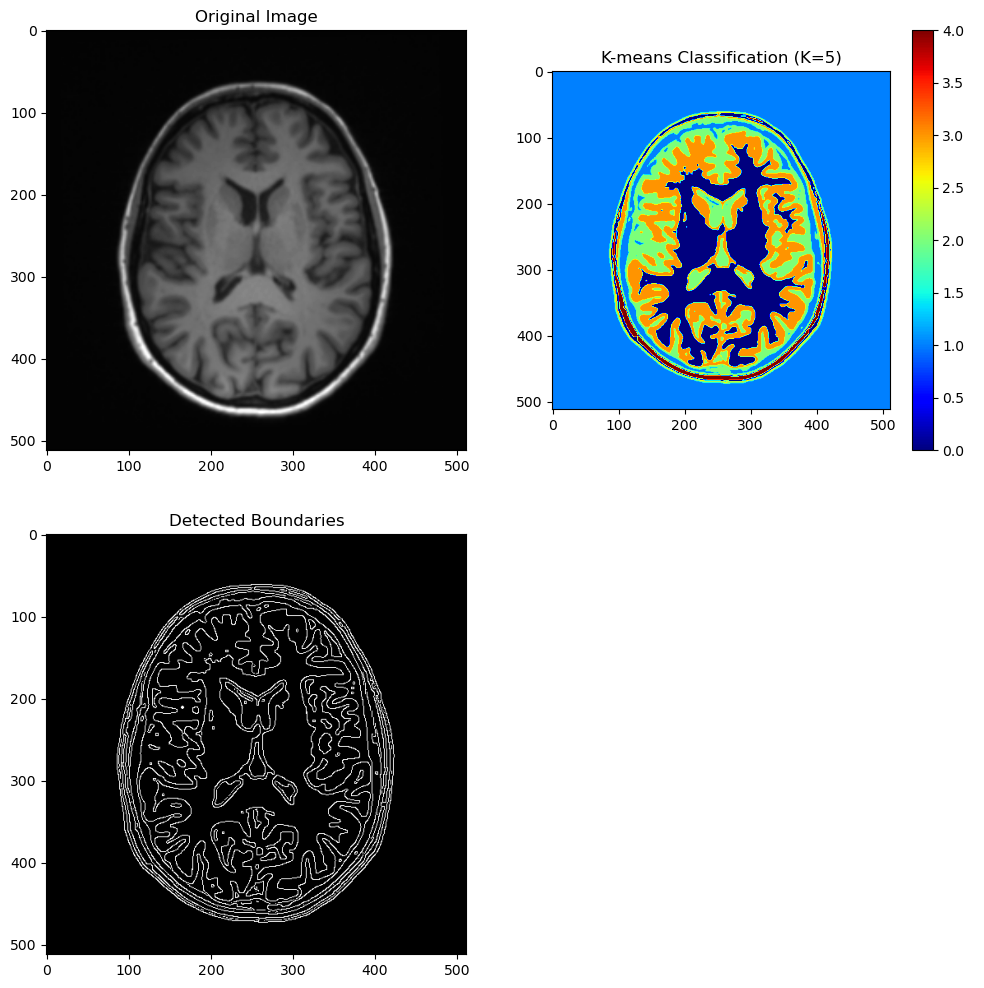

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from skimage import feature

# 假设 img_array 为输入的 512x512 灰度图像

def kmeans(img_array, K, max_iter=100, tolerance=1e-4):
    # 将图像转为一维数组
    X = img_array.flatten().reshape(-1, 1)
    
    # 随机初始化 K 个聚类中心
    np.random.seed(0)  # 设置随机种子保证结果可复现
    centroids = np.random.choice(X.flatten(), size=K).reshape(-1, 1)
    
    prev_centroids = centroids.copy()
    labels = np.zeros(X.shape, dtype=int)
    
    for i in range(max_iter):
        # 计算每个点到所有聚类中心的距离
        distances = cdist(X, centroids, 'euclidean')
        
        # 分配每个点到最近的聚类中心
        labels = np.argmin(distances, axis=1)
        
        # 更新聚类中心
        new_centroids = np.array([X[labels == k].mean() for k in range(K)]).reshape(-1, 1)
        
        # 如果中心变化很小，结束迭代
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            break
        centroids = new_centroids
    
    return labels, centroids


K=5
# 执行 K-means 聚类
labels, centroids = kmeans(img_array, K)
    
# 绘制分类边界
# 将标签重新整理为图像形状
labels_image = labels.reshape(img_array.shape)
# 获取聚类标签图像
kedges = feature.canny(labels_image.astype(float))

# 显示原始图像和分类结果
fig,axis=plt.subplots(2,2,figsize=(12, 12))

 # 原始图像
axis[0][0].imshow(img_array, cmap='gray')
axis[0][0].set_title("Original Image")
    
# 分类结果图像
labelplot=axis[0][1].imshow(labels_image, cmap='jet')
axis[0][1].set_title(f"K-means Classification (K={K})")

# 显示带有边界的分类图像
axis[1][0].imshow(kedges, cmap='gray')
axis[1][0].set_title("Detected Boundaries with Kmeans")
axis[1][1].axis('off')

plt.colorbar(labelplot, ax=axis[0][1])
plt.show()


## some other clustering-based segmentation

120.9778169482396


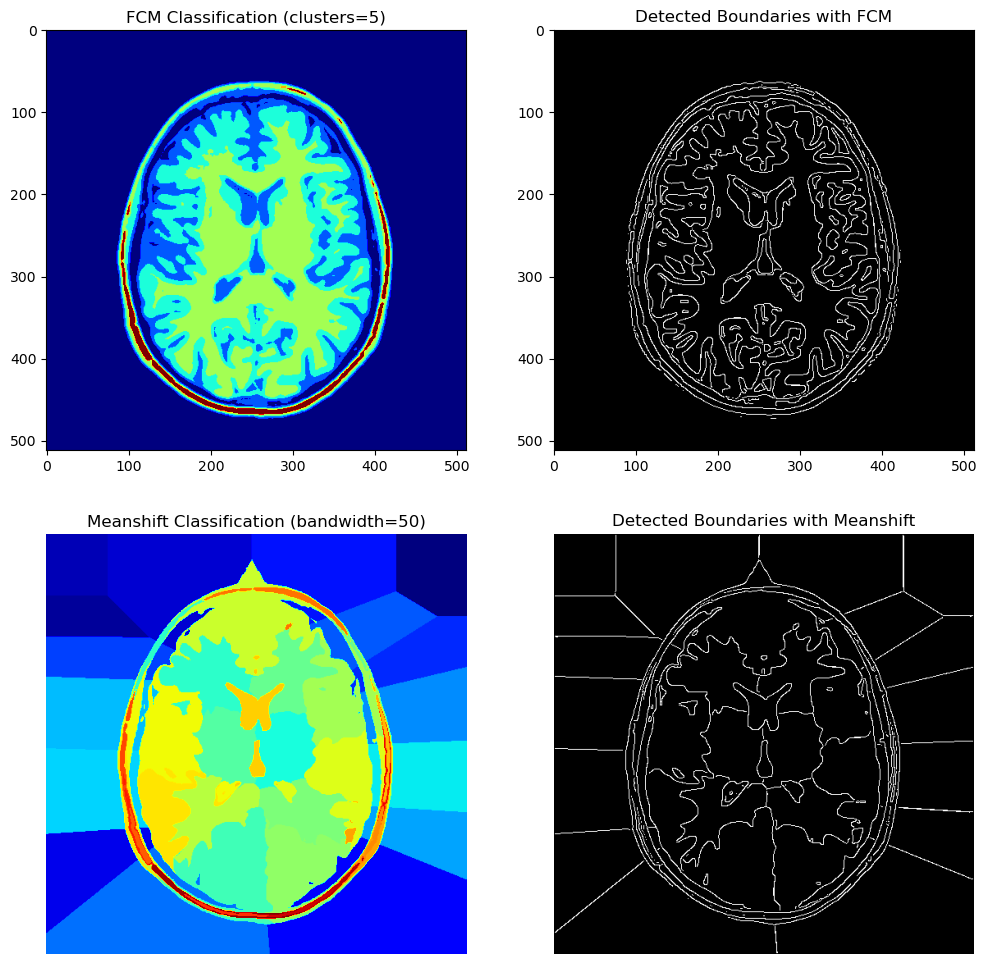

In [35]:
from skimage.color import gray2rgb
from scipy.ndimage import label, generate_binary_structure
from skimage.segmentation import mark_boundaries
import numpy as np
import cv2
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from PIL import Image
from skimage import feature
#------------导入图片-----------------------------------------
image_path = r'C:\Users\Administrator.DESKTOP-DJPMUJC\Desktop\HOMEWORK\医学图像处理\WechatIMG69.jpg'
oriimage=Image.open(image_path)#3D!
oriimage = oriimage.convert('L')#转为灰度图
img_array=np.array(oriimage,dtype=np.float32)

#-----------------FCM--------------------------- --------------
def postprocess_clusters(centers, u, img_shape):
    # 将每个像素分配给最可能的簇
    max_membership = np.argmax(u, axis=0)
    # 将标签重新映射回二维图像格式
    segmented_img = centers[max_membership].reshape(img_shape)
    return segmented_img
    
# 预处理图像
img_shape = img_array.shape
X = img_array.reshape((-1, 1))
# 标准化特征值
X = StandardScaler().fit_transform(X)
# FCM (Fuzzy C-means) 分类
n_clusters = 5  # 簇的数量，可以根据需要调整
cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(X.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)
# FCM
segmented_img_fcm = postprocess_clusters(cntr, u, img_shape)
# 边缘检测
fcmedges = feature.canny(segmented_img_fcm.astype(float))

##-----------------Meanshift-----------------------------------
# 将灰度图像转换为RGB图像（Meanshift需要3D数据）
img_rgb = gray2rgb(img_array)
# Meanshift 需要输入的是像素点的颜色值和空间位置
# 因此我们需要将每个像素的位置 (x, y) 和颜色值组合起来
rows, cols = img_array.shape
pixel_positions = np.column_stack([np.reshape(img_rgb, (-1, 3)),np.mgrid[0:rows, 0:cols].T.reshape(-1, 2)])

# 使用estimate_bandwidth函数自动估计带宽
bandwidth = estimate_bandwidth(pixel_positions, quantile=0.1, n_samples=500)
print(bandwidth)
bandwidth=50
# 创建Meanshift模型并拟合数据
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pixel_positions)
# 获取聚类标签
labels = ms.labels_
# 转换回原始图像形状
mssegmented_img = labels.reshape(rows, cols)
# 边缘检测
msedges = feature.canny(mssegmented_img.astype(float))

# --------------------绘制结果-----------------------------------------------
# 显示原始图像和分类结果
fig,axis=plt.subplots(2,2,figsize=(12,12))
 # 原始图像
# 分类结果图像
fcmlabelplot=axis[0][0].imshow(segmented_img_fcm,cmap='jet')
axis[0][0].set_title(f"FCM Classification (clusters={n_clusters})")
# 显示带有边界的分类图像
axis[0][1].imshow(fcmedges, cmap='gray')
axis[0][1].set_title("Detected Boundaries with FCM")
axis[1][0].imshow(mssegmented_img,cmap='jet')
axis[1][0].set_title(f"Meanshift Classification (bandwidth={bandwidth})")
axis[1][0].axis('off')
axis[1][1].imshow(msedges,cmap='gray')
axis[1][1].set_title('Detected Boundaries with Meanshift')
axis[1][1].axis('off')
plt.show()
